In [ ]:
from zipfile import ZipFile
file_name = "XCT-Dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import os

set1sample2_dir = os.path.join('/content/XCT-Dataset/Train/set1sample2')
set1sample3_dir = os.path.join('/content/XCT-Dataset/Train/set1sample3')
set1sample4_dir = os.path.join('/content/XCT-Dataset/Train/set1sample4')
set1sample5_dir = os.path.join('/content/XCT-Dataset/Train/set1sample5')
set1sample6_dir = os.path.join('/content/XCT-Dataset/Train/set1sample6')

print('total training set1sample2 images:', len(os.listdir(set1sample2_dir)))
print('total training set1sample3 images:', len(os.listdir(set1sample3_dir)))
print('total training set1sample4 images:', len(os.listdir(set1sample4_dir)))
print('total training set1sample5 images:', len(os.listdir(set1sample5_dir)))
print('total training set1sample6 images:', len(os.listdir(set1sample6_dir)))

set1sample2_files = os.listdir(set1sample2_dir)
print(set1sample2_files[:10])


set1sample3_files = os.listdir(set1sample3_dir)
print(set1sample3_files[:10])


set1sample4_files = os.listdir(set1sample4_dir)
print(set1sample4_files[:10])


set1sample5_files = os.listdir(set1sample5_dir)
print(set1sample5_files[:10])

set1sample6_files = os.listdir(set1sample6_dir)
print(set1sample6_files[:10])

total training set1sample2 images: 112
total training set1sample3 images: 111
total training set1sample4 images: 91
total training set1sample5 images: 111
total training set1sample6 images: 120
['set1sample2raw_0120.png', 'set1sample2raw_0024.png', 'set1sample2raw_0069.png', 'set1sample2raw_0047.png', 'set1sample2raw_0098.png', 'set1sample2raw_0111.png', '.DS_Store', 'set1sample2raw_0062.png', 'set1sample2raw_0061.png', 'set1sample2raw_0033.png']
['set1sample3raw_0085.png', 'set1sample3raw_0111.png', 'set1sample3raw_0107.png', 'set1sample3raw_0061.png', 'set1sample3raw_0037.png', 'set1sample3raw_0011.png', 'set1sample3raw_0021.png', 'set1sample3raw_0064.png', 'set1sample3raw_0034.png', 'set1sample3raw_0041.png']
['set1sample4raw_0045.png', 'set1sample4raw_0010.png', 'set1sample4raw_0057.png', 'set1sample4raw_0076.png', 'set1sample4raw_0022.png', 'set1sample4raw_0035.png', 'set1sample4raw_0082.png', 'set1sample4raw_0081.png', 'set1sample4raw_0018.png', 'set1sample4raw_0033.png']
['set1s

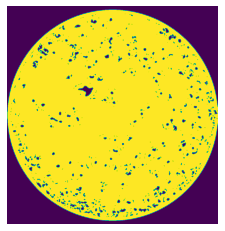

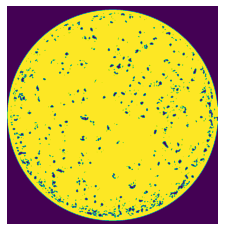

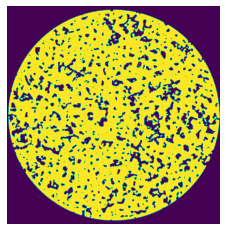

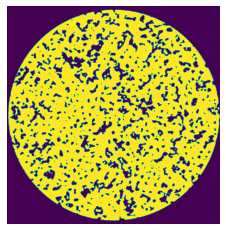

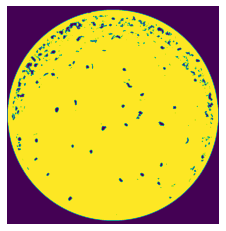

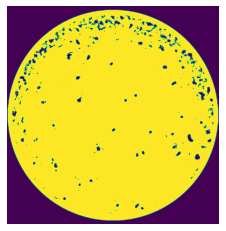

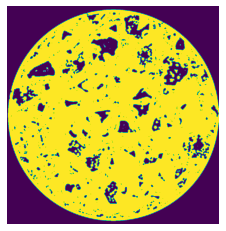

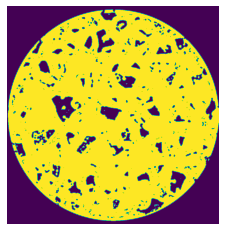

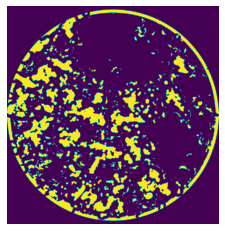

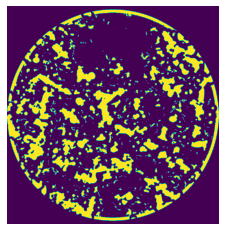

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



pic_index = 2

next_set1sample2 = [os.path.join(set1sample2_dir, fname)
                       for fname in set1sample2_files[pic_index-2:pic_index]]
next_set1sample3 = [os.path.join(set1sample3_dir, fname)
                       for fname in set1sample3_files[pic_index-2:pic_index]]
next_set1sample4 = [os.path.join(set1sample4_dir, fname)
                       for fname in set1sample4_files[pic_index-2:pic_index]]
next_set1sample5 = [os.path.join(set1sample5_dir, fname)
                       for fname in set1sample5_files[pic_index-2:pic_index]]
next_set1sample6 = [os.path.join(set1sample6_dir, fname)
                       for fname in set1sample6_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_set1sample2+next_set1sample3+next_set1sample4+next_set1sample5+next_set1sample6):
  #print (img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/XCT-Dataset/Train"
training_datagen = ImageDataGenerator(rescale = 1./255)

VALIDATION_DIR = "/content/XCT-Dataset/Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=10
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=1
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.25),
    # 512 neuron hidden layer
    #tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer= 'rmsprop' , metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=5, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")


Found 544 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0         
_________________________________________

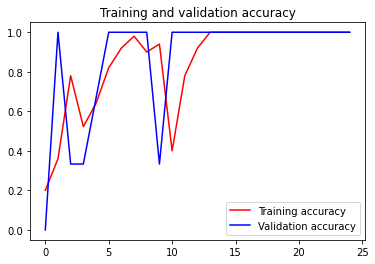

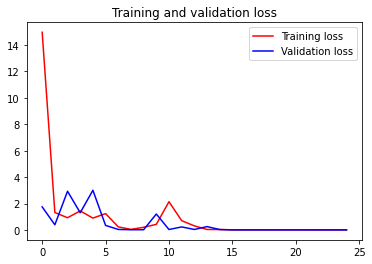

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes)

Using TensorFlow backend.


Saving set1sample2raw_0121.png to set1sample2raw_0121.png
Saving set1sample2raw_0122.png to set1sample2raw_0122.png
Saving set1sample2raw_0123.png to set1sample2raw_0123.png
Saving set1sample2raw_0124.png to set1sample2raw_0124.png
Saving set1sample2raw_0125.png to set1sample2raw_0125.png
Saving set1sample3raw_0121.png to set1sample3raw_0121.png
Saving set1sample3raw_0122.png to set1sample3raw_0122.png
Saving set1sample3raw_0123.png to set1sample3raw_0123.png
Saving set1sample3raw_0124.png to set1sample3raw_0124.png
Saving set1sample3raw_0125.png to set1sample3raw_0125.png
Saving set1sample4raw_0101.png to set1sample4raw_0101.png
Saving set1sample4raw_0102.png to set1sample4raw_0102.png
Saving set1sample4raw_0103.png to set1sample4raw_0103.png
Saving set1sample4raw_0104.png to set1sample4raw_0104.png
Saving set1sample4raw_0105.png to set1sample4raw_0105.png
Saving set1sample5raw_0121.png to set1sample5raw_0121.png
Saving set1sample5raw_0122.png to set1sample5raw_0122.png
Saving set1sam